In [1]:
import sqlite3
connection = sqlite3.connect('student_grades.db')
cursor = connection.cursor()

In [2]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
student_id INTEGER PRIMARY KEY AUTOINCREMENT, 
first_name TEXT,
last_name TEXT)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
grades_id INTEGER PRIMARY KEY AUTOINCREMENT,
student_id INTEGER,
subject TEXT,
grade INT,
FOREIGN KEY (student_id) REFERENCES students(student_id))
''')

In [3]:
student_data = [
    ('Alice','Johnson'),
    ('Bob', 'Smith'),
    ('Carol','White'),
    ('David', 'Brown'),
    ('Eve', 'Davis')
]

cursor.executemany('''
INSERT INTO students (first_name, last_name) VALUES (?, ?)
''', student_data)

connection.commit()

In [4]:
grades_data = [
    (1,'Math', 95),
    (1,'English', 88),
    (1, 'History', 90),
    (2, 'Math', 82), 
    (2, 'English', 76),
    (2, 'History', 85)
]

cursor.executemany('''
INSERT INTO grades (student_id, subject, grade) VALUES (?, ?, ?)
''', grades_data)

connection.commit()

In [5]:
cursor.execute("SELECT students.first_name, grades.grade FROM students JOIN grades ON students.student_id = grades.student_id")
all_grades = cursor.fetchall()
for row in all_grades:
    print(f"Student: {row[0]}, Grade: {row[1]}")

Student: Alice, Grade: 95
Student: Alice, Grade: 88
Student: Alice, Grade: 90
Student: Bob, Grade: 82
Student: Bob, Grade: 76
Student: Bob, Grade: 85


In [6]:
cursor.execute("SELECT students.first_name, AVG(grades.grade) FROM students JOIN grades ON students.student_id = grades.student_id GROUP BY students.student_id")
avg_grades = cursor.fetchall()

for row in avg_grades:
    print(f"Student: {row[0]}, Average Grade: {row[1]}")

Student: Alice, Average Grade: 91.0
Student: Bob, Average Grade: 81.0


In [7]:
cursor.execute("SELECT students.first_name, AVG(grades.grade) AS average_grade FROM students JOIN grades ON students.student_id = grades.student_id GROUP BY students.student_id ORDER BY average_grade DESC LIMIT 1")
highest_avg_grade = cursor.fetchone()

print(f"Student with the highest average grade: {highest_avg_grade[0]}")

Student with the highest average grade: Alice


In [8]:
cursor.execute("SELECT AVG(grades.grade) FROM grades WHERE grades.subject = 'Math' ")
avg_grade = cursor.fetchone()
print(f"Average grade for Math: {avg_grade[0]}")

Average grade for Math: 88.5


In [9]:
cursor.execute("SELECT students.first_name FROM students JOIN grades ON students.student_id = grades.student_id WHERE grades.grade > 90")
students = cursor.fetchall()

for row in students:
    print(f"Student: {row[0]}")

Student: Alice


In [10]:
import pandas as pd
connection = sqlite3.connect('student_grades.db')

students_df = pd.read_sql_query('SELECT * FROM students', connection)
grades_df = pd.read_sql_query('SELECT * FROM grades', connection)

In [11]:
connection = sqlite3.connect('student_grades.db')

combined_df = pd.read_sql_query('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''', connection)


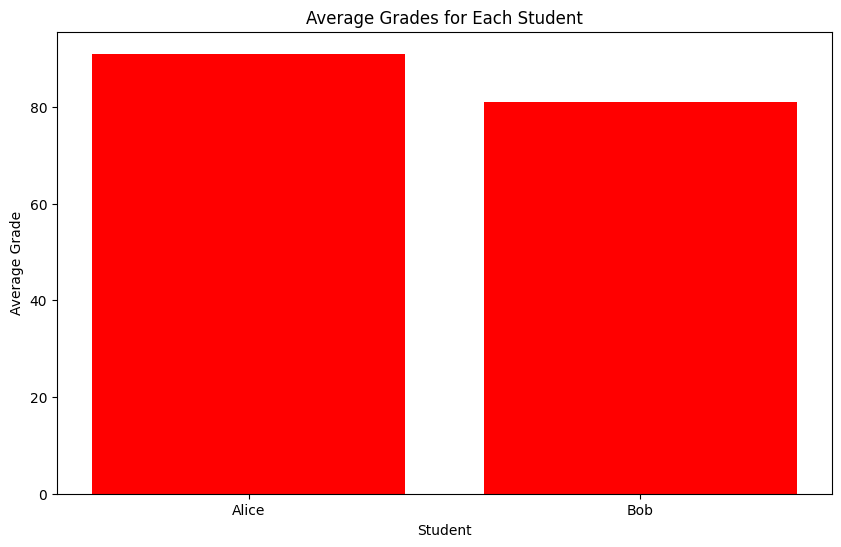

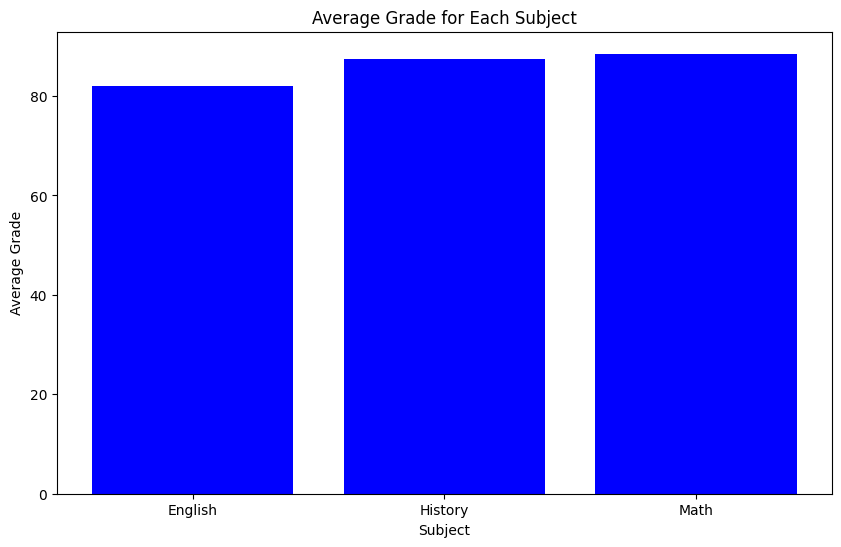

In [12]:
import matplotlib.pyplot as plt

connection = sqlite3.connect('student_grades.db')

avg_grades_df = pd.read_sql_query('''
SELECT students.first_name, AVG(grades.grade) AS average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
''', connection)

avg_subject_grades_df = pd.read_sql_query('''
SELECT subject, AVG(grade) AS average_grade
FROM grades
GROUP BY subject
''', connection)

#average grades for each student
plt.figure(figsize=(10, 6))
plt.bar(avg_grades_df['first_name'], avg_grades_df['average_grade'], color='red')
plt.xlabel('Student')
plt.ylabel('Average Grade')
plt.title('Average Grades for Each Student')
plt.show()

# average grade for each subject
plt.figure(figsize=(10, 6))
plt.bar(avg_subject_grades_df['subject'], avg_subject_grades_df['average_grade'], color='blue')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grade for Each Subject')
plt.show()

In [ ]:
#DELETE ALL THE DATA
import sqlite3
connection = sqlite3.connect('student_grades.db')
cursor = connection.cursor()

cursor.execute("DELETE FROM students")
cursor.execute("DELETE FROM grades")
connection.commit()

print("All data from student and grades tables has been deleted.")